In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
%%capture
# MRCONSO column descriptions
# https://www.ncbi.nlm.nih.gov/books/NBK9685/table/ch03.T.concept_names_and_sources_file_mr/
'''
Concept Names and Sources (File = MRCONSO.RRF)

There is exactly one row in this file for each atom (each occurrence of each unique 
string or concept name within each source vocabulary) in the Metathesaurus, i.e., there 
is exactly one row for each unique AUI in the Metathesaurus. Every string or concept name
in the Metathesaurus appears in this file, connected to its language, source vocabularies,
and its concept identifier. The values of TS, STT, and ISPREF reflect the default order of
precedence of vocabulary sources and term types in MRRANK.RRF.

From: https://www.ncbi.nlm.nih.gov/books/NBK9685/'''

In [14]:
%%time
umls = pd.read_csv('/Users/stearb/desktop/UMLS_2019AB/MRCONSO.RRF',sep='|',header=None)
umls = umls.iloc[:, :-1] # remove last column, it's just NaNs.


umls.columns = ['CUI','LAT','TS','LUI','STT','SUI','ISPREF','AUI',
                'SAUI','SCUI','SDUI','SAB','TTY','CODE','STR','SRL','SUPPRESS','CVF']
print(umls.shape)

<string>:2: DtypeWarning: Columns (9,10,13) have mixed types.Specify dtype option on import or set low_memory=False.


(8428569, 18)
CPU times: user 25 s, sys: 11 s, total: 36 s
Wall time: 36.4 s


In [4]:
umls.drop(['SRL','SUPPRESS','CVF'],axis=1,inplace=True) # drop these cols, theyre not immediately interesting 

In [45]:
umls.head(5)

,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
0,C0000005,ENG,P,L0000005,PF,S0007492,Y,A26634265,NaN,M0019694,D012711,MSH,PEP,D012711,(131)I-Macroaggregated Albumin,0,N,256.0
1,C0000005,ENG,S,L0270109,PF,S0007491,Y,A26634266,NaN,M0019694,D012711,MSH,ET,D012711,(131)I-MAA,0,N,256.0
2,C0000039,ENG,P,L0000039,PF,S17175117,Y,A28572604,NaN,NaN,NaN,MTH,PN,NOCODE,"1,2-dipalmitoylphosphatidylcholine",0,N,NaN
3,C0000039,ENG,P,L0000039,VC,S0007564,N,A17972823,NaN,N0000007747,NaN,NDFRT,PT,N0000007747,"1,2-Dipalmitoylphosphatidylcholine",0,N,256.0
4,C0000039,ENG,P,L0000039,VC,S0007564,Y,A0016515,NaN,M0023172,D015060,MSH,MH,D015060,"1,2-Dipalmitoylphosphatidylcholine",0,N,256.0


#### Column definitions in MRCONSO.RRF  
#### https://www.ncbi.nlm.nih.gov/books/NBK9685/table/ch03.T.concept_names_and_sources_file_mr/
CUI = Unique identifier for concept  
LAT = Language of term  
TS  = Term status  
LUI = Unique identifier for term  
STT = String type  
SUI = Unique identifier for string    
ISPREF = Atom status - preferred (Y) or not (N) for this string within this concept  
AUI = Unique identifier for atom - variable length field, 8 or 9 characters  
SAUI = Source asserted atom identifier (optional)   
SCUI = Source asserted concept identifier (optional)  
SDUI = Source asserted descriptor identifier (optional)  
SAB = Abbreviated source name (SAB)  
TTY = Abbrev. for term type in source vocab., ie. PN (Metathesaurus Preferred Name) or CD (Clinical Drug)  
CODE = Most useful source asserted ID (if source vocab has more than one identifier), or a Metathesaurus-generated source entry identifier (if the source vocabulary has none)  
STR = String  
SRL = Source restriction level   
SUPPRESS = Suppressible Flag  (Values = O, E, Y, or N)  
CVF = Content View Flag  

#### Show all Sources
https://www.nlm.nih.gov/research/umls/sourcereleasedocs/index.html  <-- all source docs

In [5]:
pd.Series(umls['SAB'].unique()).sort_values().values

array(['AIR', 'BI', 'CCC', 'CCPSS', 'CCS', 'CCS_10', 'COSTAR', 'CPM',
       'CPT', 'CSP', 'CST', 'DDB', 'DRUGBANK', 'DSM-5', 'DXP', 'FMA',
       'GO', 'GS', 'HCDT', 'HCPT', 'HGNC', 'HL7V2.5', 'HL7V3.0', 'HPO',
       'ICD10', 'ICD10AE', 'ICD10AM', 'ICD10AMAE', 'ICD10PCS', 'ICD9CM',
       'ICF', 'ICF-CY', 'JABL', 'LCH', 'LCH_NW', 'LNC', 'MEDCIN',
       'MEDLINEPLUS', 'MSH', 'MTH', 'MTHICD9', 'NCBI', 'NCI', 'NCI_BRIDG',
       'NCI_BioC', 'NCI_CDC', 'NCI_CDISC', 'NCI_CRCH', 'NCI_CTCAE',
       'NCI_CTEP-SDC', 'NCI_CareLex', 'NCI_DCP', 'NCI_DICOM', 'NCI_DTP',
       'NCI_FDA', 'NCI_GAIA', 'NCI_GENC', 'NCI_ICH', 'NCI_JAX',
       'NCI_KEGG', 'NCI_NCI-GLOSS', 'NCI_NCI-HGNC', 'NCI_NCI-HL7',
       'NCI_NCPDP', 'NCI_NICHD', 'NCI_PI-RADS', 'NCI_PID', 'NCI_RENI',
       'NCI_UCUM', 'NCI_ZFin', 'NDFRT', 'NEU', 'OMIM', 'QMR', 'RAM',
       'RCD', 'RCDAE', 'RCDSA', 'RCDSY', 'SNM', 'SNMI', 'SNOMEDCT_US',
       'SNOMEDCT_VET', 'SRC', 'UWDA', 'VANDF', 'WHO'], dtype=object)

#### Show all Languages

In [6]:
pd.Series(umls['LAT'].unique()).sort_values().values

array(['ENG'], dtype=object)

#### Show number of Unique Codes, Termsa and Strings

In [47]:
print(f'Number of Code Unique IDs: {umls["CUI"].unique().shape}')
print(f'Number of Term Unique IDs: {umls["LUI"].unique().shape}')
print(f'Number of String Unique IDs: {umls["SUI"].unique().shape}')
print(f'Number of Atomic Unique IDs: {umls["AUI"].unique().shape}') # unique AUI for each row in MRCONSO.RRF
print(f'Number of unique strings: {umls["STR"].unique().shape}') 

Number of Code Unique IDs: (3194901,)
Number of Term Unique IDs: (6359168,)
Number of String Unique IDs: (7043911,)
Number of Atomic Unique IDs: (8428569,)
Number of unique strings: (7043870,)


### HGNC 

#### How many HGNC rows are there?

In [8]:
hgnc = umls[umls['SAB'] == 'HGNC']
print(hgnc.shape)
hgnc.head()   

(172110, 15)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR
80213,C0008288,ENG,P,L11608660,PF,S14400918,N,A23815064,NaN,HGNC:20365,NaN,HGNC,MTH_ACR,HGNC:20365,CIPC gene
80215,C0008288,ENG,S,L0008808,PF,S0025504,N,A23821008,NaN,HGNC:20365,NaN,HGNC,ACR,HGNC:20365,CIPC
80217,C0008288,ENG,S,L11610224,PF,S14400946,Y,A23811680,NaN,HGNC:20365,NaN,HGNC,NaN,HGNC:20365,"CLOCK-interacting protein, circadian"
80219,C0008288,ENG,S,L11613423,VC,S16892055,Y,A27918862,NaN,HGNC:20365,NaN,HGNC,PT,HGNC:20365,CLOCK interacting pacemaker
168857,C0017351,ENG,P,L0577495,PF,S0664873,N,A21253417,NaN,HGNC:5477,NaN,HGNC,MTH_ACR,HGNC:5477,IGH gene


#### How many unique HGNC codes (genes) are there?

In [12]:
hgnc['CODE'].unique().shape  # probably dont need mygene.info gene list, but might need to add gene info to umls genes 

(40978,)

### GO

In [18]:
go = umls[umls['SAB']=='GO']
print(go.shape)
go.head()

(177286, 18)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
351,C0000184,ENG,P,L0000184,VO,S8803462,N,A14256157,NaN,NaN,GO:0004113,GO,ET,GO:0004113,"cyclic 2',3'-nucleotide phosphodiesterase",0,N,NaN
352,C0000184,ENG,P,L0000184,VO,S8803462,Y,A14236040,NaN,NaN,GO:0008663,GO,ET,GO:0008663,"cyclic 2',3'-nucleotide phosphodiesterase",0,N,NaN
7604,C0001216,ENG,P,L0001216,VC,S0414295,Y,A23854726,NaN,NaN,GO:0001669,GO,SY,GO:0001669,acrosome,0,N,256.0
7609,C0001216,ENG,S,L0277700,VC,S13005529,N,A20222996,NaN,NaN,GO:0001669,GO,SY,GO:0001669,acrosomal granule,0,N,256.0
7614,C0001216,ENG,S,L0277702,VC,S11415091,Y,A17477125,NaN,NaN,GO:0001669,GO,PT,GO:0001669,acrosomal vesicle,0,N,256.0


In [ ]:
#### How many unique GO terms are there?

In [26]:
go['CODE'].unique().shape    # go[['CUI','CODE','STR']].iloc[-10:,:]  # look at last 10 GO terms

(46569,)

### HPO

In [35]:
hpo = umls[umls['SAB']=='HPO']
print(hpo.shape)
hpo.head()

(29064, 18)


,CUI,LAT,TS,LUI,STT,SUI,ISPREF,AUI,SAUI,SCUI,SDUI,SAB,TTY,CODE,STR,SRL,SUPPRESS,CVF
2445,C0000731,ENG,P,L0486265,VCW,S1616714,Y,A24680170,NaN,NaN,HP:0003270,HPO,SY,HP:0003270,Distended abdomen,0,N,256.0
2450,C0000731,ENG,S,L0000731,PF,S0467467,N,A24682424,NaN,NaN,HP:0003270,HPO,SY,HP:0003270,Abdominal distension,0,N,256.0
2460,C0000731,ENG,S,L0000731,VO,S0353653,N,A24677906,NaN,NaN,HP:0003270,HPO,PT,HP:0003270,Abdominal distention,0,N,256.0
2466,C0000731,ENG,S,L0085124,PF,S0001569,Y,A27414126,NaN,NaN,HP:0003270,HPO,SY,HP:0003270,Bloating,0,N,256.0
2475,C0000731,ENG,S,L0276350,PF,S0353647,Y,A27414159,NaN,NaN,HP:0003270,HPO,SY,HP:0003270,Abdominal bloating,0,N,256.0


#### How many unique HPO terms are there?

In [28]:
hpo['CODE'].unique().shape   # Nico's dataset has 8,554 HPO-MP pairs

(12762,)

In [53]:
# Search for an HPO terms
'Congenital heart defects and skeletal malformations syndrome' in hpo['STR'].values

False

In [54]:
'Autosomal dominant inheritance' in hpo['STR'].values

True

In [57]:
list(hpo['STR']).index('Autosomal dominant inheritance')

7472

In [60]:
list(hpo['STR']).count('Autosomal dominant inheritance')

1

In [62]:
'HP:0001680' in hpo['CODE'].values

True

#### Show where NANs are

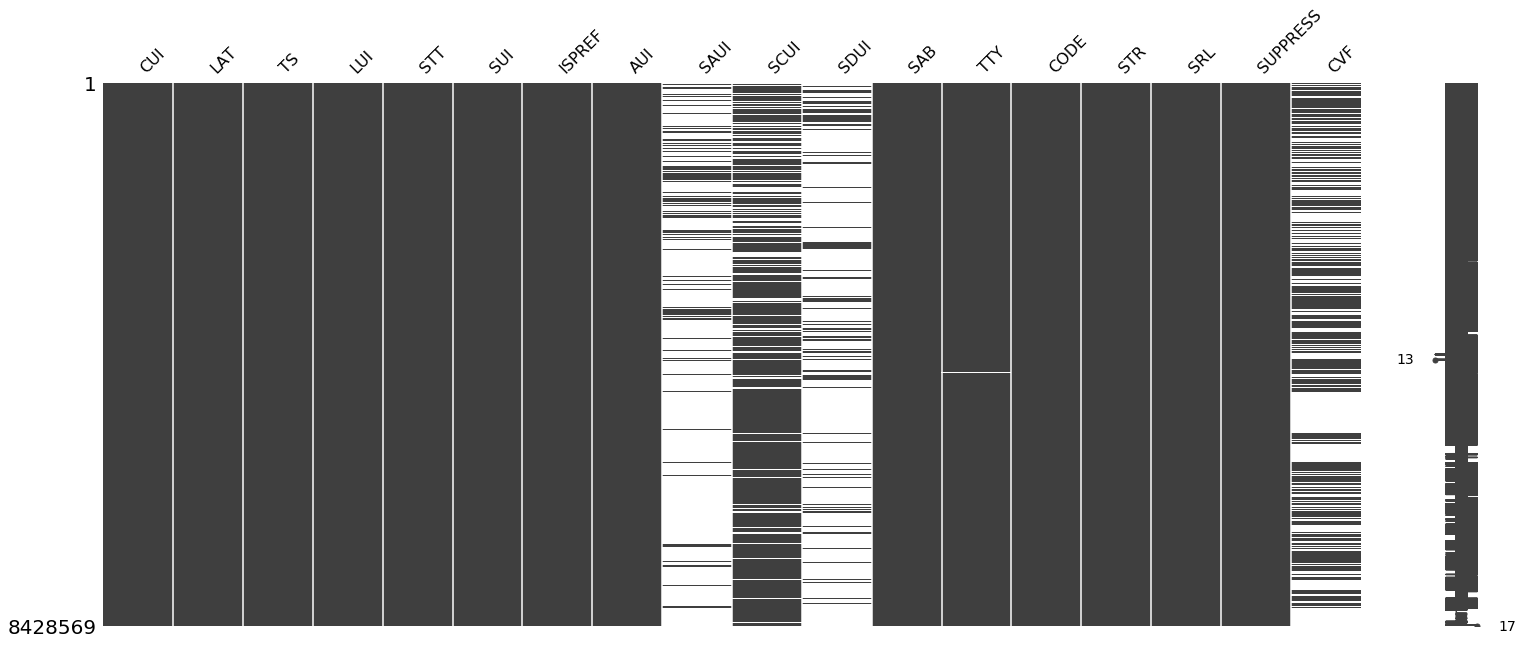

In [43]:
import missingno as msno
msno.matrix(umls)

### Generate hash UUID for all mouse genes

In [29]:
import uuid
# example on generating hash uuid for string 'python.org':   uuid.uuid3(uuid.NAMESPACE_DNS, 'python.org')

mouse_genes = pd.read_csv('homologous_genes.csv',index_col=0)['Mouse'].values

mousegene_uuid=[]
for GENE in mouse_genes:
    mousegene_uuid.append(uuid.uuid3(uuid.NAMESPACE_DNS, GENE))
    
mousegene_uuid[:6]

In [34]:
mousegene_uuid_str = [str(i) for i in mousegene_uuid]
mousegene_uuid_str[:6]

['17959968-a2de-3a1f-9be2-fc7a1bb15913',
 '13b5d145-8769-34e9-b4ad-73eaabdc68ce',
 '4e75f09c-b912-3450-aaef-772242a5c393',
 'd6ddcc5c-5072-37aa-a4e2-c1010b9f216a',
 'ade65c22-b58f-393b-aef8-537a9979ac33',
 '52555755-d5bb-3299-b28f-09778d40cd2d']

In [77]:
pd.DataFrame(np.transpose([mouse_genes,mousegene_uuid_str]),
             columns=['Mouse Gene','UUID']).to_csv('mousegene_uuid.csv')